In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
co2_year = pd.read_excel("co2_year.xlsx")
co2021 = pd.read_excel("co2_sector2021.xlsx")
co2transporte = pd.read_excel("transportation.xlsx")

unidad -> Million Metric tons (MMt) - Millones de toneladas

In [178]:
co2_year = co2_year.iloc[:51, [0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]]

In [179]:
co2021 = co2021.iloc[:51, [0,1,2,3,4,5]]

In [180]:
co2transporte = co2transporte.iloc[:51, [0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]]

In [181]:
from ydata_profiling import ProfileReport

In [182]:
reportco2 = ProfileReport(co2_year)

## **CO2 por año por estado**

En los ultimos 20 años, Estados unidos alcanzó un pico histórico en el 2007 a partir del cual implementó medidas para disminuirlo

<function matplotlib.pyplot.show(close=None, block=None)>

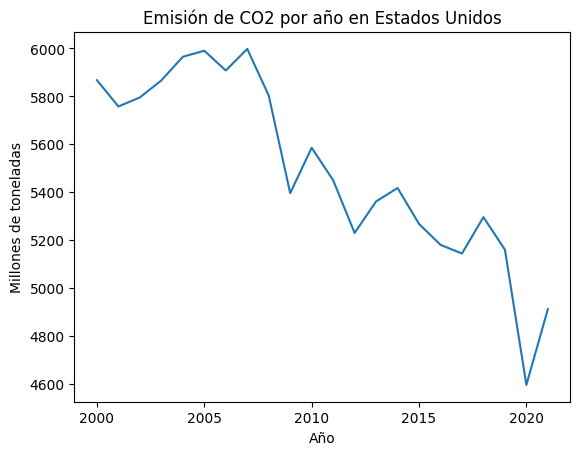

In [183]:
plt.figure()
sns.lineplot(data=co2_year.sum()[1:])
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 por año en Estados Unidos")
plt.show

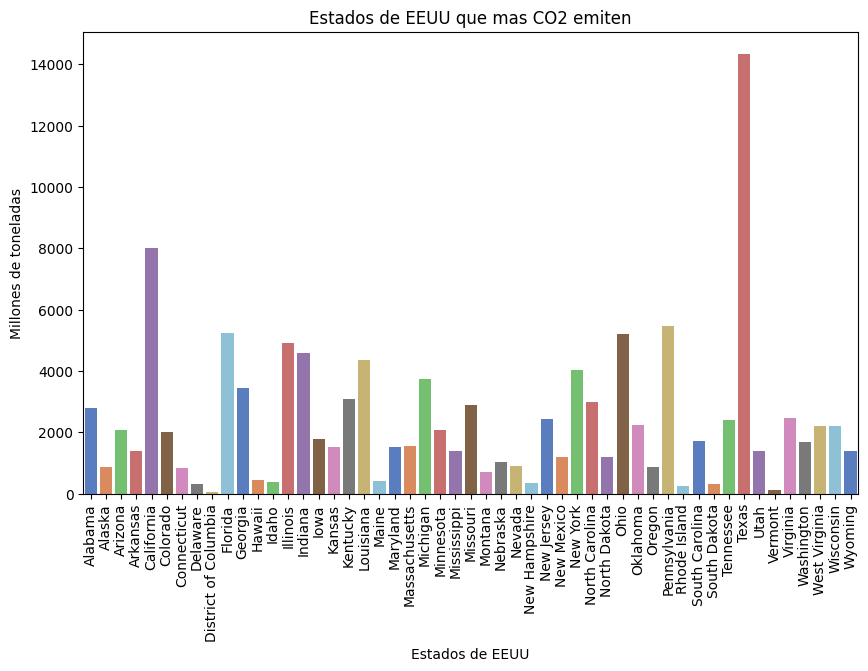

In [184]:
y = co2_year.T[1:].sum().values
x = co2_year["State"].values
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="muted")
plt.title("Estados de EEUU que mas CO2 emiten")
plt.xlabel("Estados de EEUU")
plt.xticks(rotation=90)
plt.ylabel("Millones de toneladas")
plt.show()

In [185]:
#Convertimos las columnas como categorias de una sola columna
lista = co2_year.columns.to_list()[2:]
co2año = co2_year[["State", 2000]].rename(columns={2000:"CO2"})
co2año["Year"] = 2000

for i in lista:
    df = co2_year[["State", i]].rename(columns={i:"CO2"})
    df["Year"] = i
    co2año = pd.concat([co2año, df])


Podemos ver que los estados de Texas y California son, por mucho, los estados que más CO2 emiten en Estados Unidos

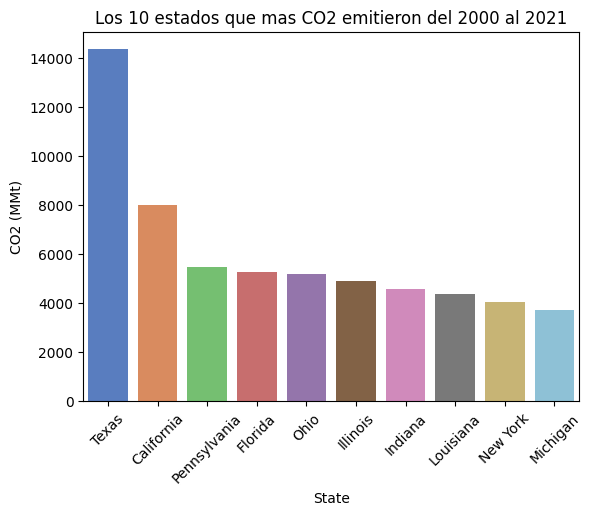

In [186]:
a = co2año[["State", "CO2"]].groupby("State").sum().sort_values(by="CO2",ascending=False).head(10)
plt.figure()
sns.barplot(data=a,x="State", y="CO2" ,palette="muted")
plt.title("Los 10 estados que mas CO2 emitieron del 2000 al 2021")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.show()

El estado de New York, si bien sigue una tendencia similar a la del país, empezó a descender sus niveles de emisión de CO2 en el 2004

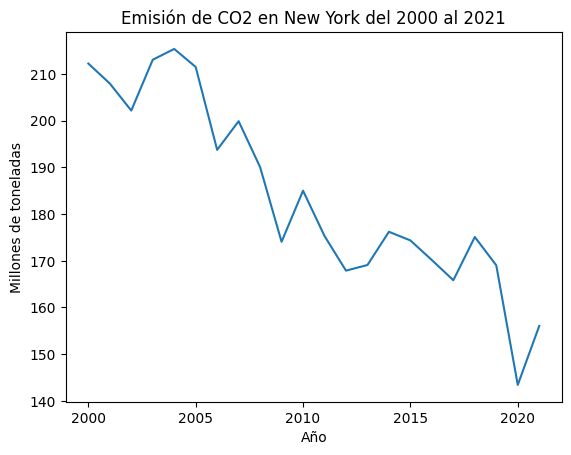

In [187]:
plt.figure()
sns.lineplot(data=co2año[(co2año["State"] == "New York")], y="CO2", x="Year")
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 en New York del 2000 al 2021")
plt.show()


En líneas generales, todos los estados se acoplaron a la tendencia excepto Texas

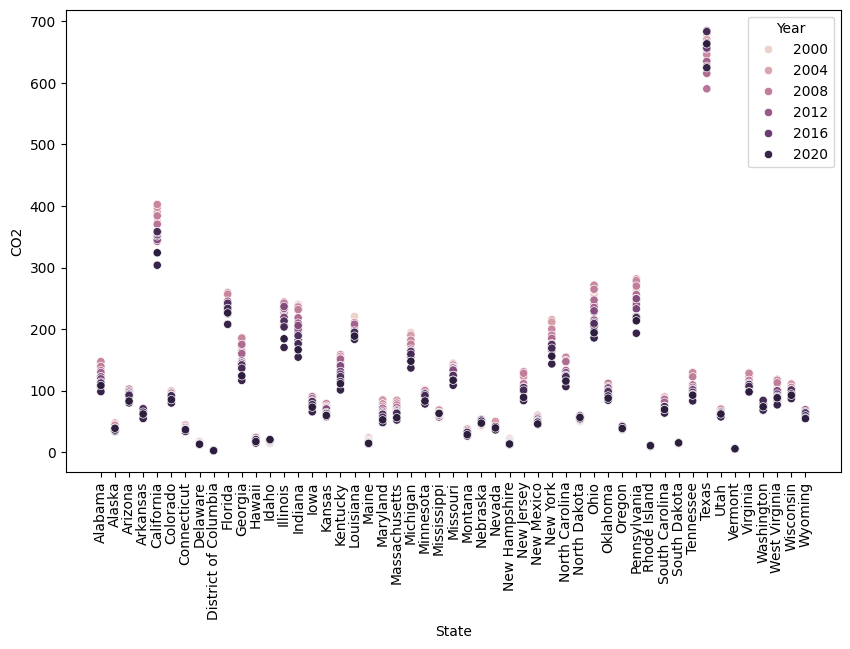

In [188]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=co2año, x="State", y="CO2", hue="Year")
plt.xticks(rotation=90)
plt.show()

## **Emision de CO2 por transporte**

Con respecto al sector vehicular, notamos dos picos, en 2007 y 2019, con la abrupta caída en el 2020 debido a la pandemia

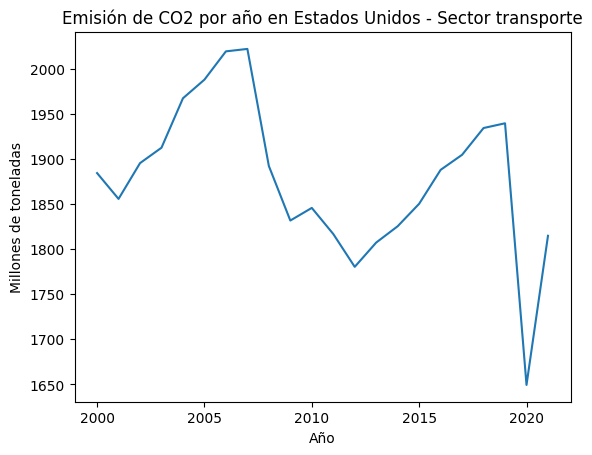

In [189]:
plt.figure()
sns.lineplot(data=co2transporte.sum()[1:])
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 por año en Estados Unidos - Sector transporte")
plt.show()

In [190]:
lista = co2transporte.columns.to_list()[2:]
co2añot = co2transporte[["State", 2000]].rename(columns={2000:"CO2_transporte"})
co2añot["Year"] = 2000

for i in lista:
    df = co2transporte[["State", i]].rename(columns={i:"CO2_transporte"})
    df["Year"] = i
    co2añot = pd.concat([co2añot, df])

New York es el cuarto estado de USA que produce más CO2 debido al transporte

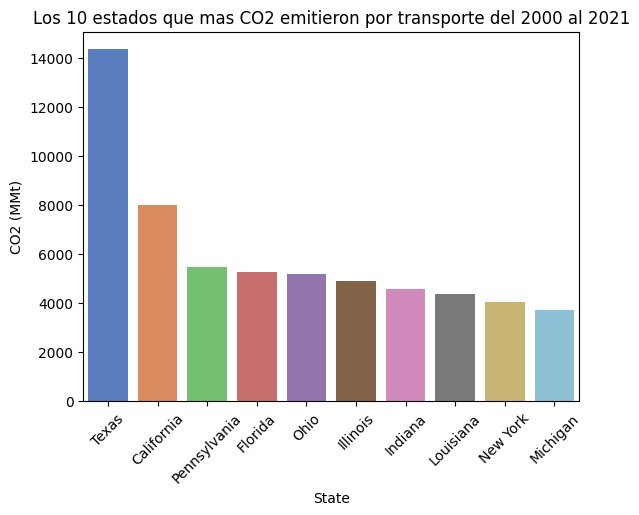

In [191]:
a = co2año[["State", "CO2"]].groupby("State").sum().sort_values(by="CO2",ascending=False).head(10)
plt.figure()
sns.barplot(data=a,x="State", y="CO2" ,palette="muted")
plt.title("Los 10 estados que mas CO2 emitieron por transporte del 2000 al 2021")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.show()

Comparativa CO2 por transporte con respecto al total

In [192]:
co2año["CO2_transporte"] = co2añot["CO2_transporte"]

In [193]:
a = co2año[["State", "CO2", "CO2_transporte"]].groupby("State").sum().sort_values(by="CO2_transporte", ascending=False).head(10)

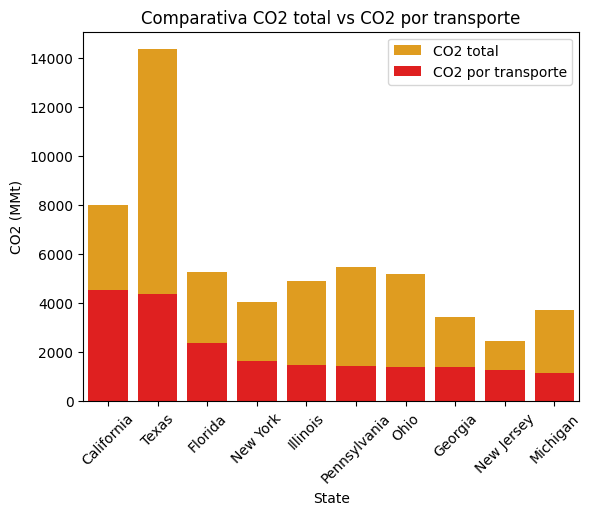

In [194]:
plt.figure()
s1= sns.barplot(data=a, x="State", y="CO2", color="orange", label="CO2 total")
s2= sns.barplot(data=a, x="State", y="CO2_transporte", color="red", label="CO2 por transporte")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.title("Comparativa CO2 total vs CO2 por transporte")
plt.show()

In [195]:
a = co2año[(co2año["State"] == "New York")]
a = co2año[["Year", "CO2", "CO2_transporte"]].groupby("Year").sum().sort_values(by="CO2_transporte", ascending=False)

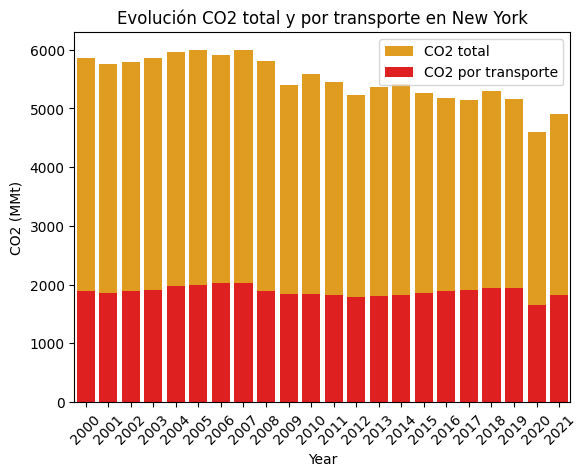

In [196]:
plt.figure()
sns.barplot(data=a, x="Year", y="CO2", color="orange", label="CO2 total")
sns.barplot(data=a, x="Year", y="CO2_transporte", color="red", label="CO2 por transporte")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.title("Evolución CO2 total y por transporte en New York")
plt.show()

## **CO2 en 2021**

El sector de transporte es el que más produjo CO2 en el 2021 en los Estados Unidos

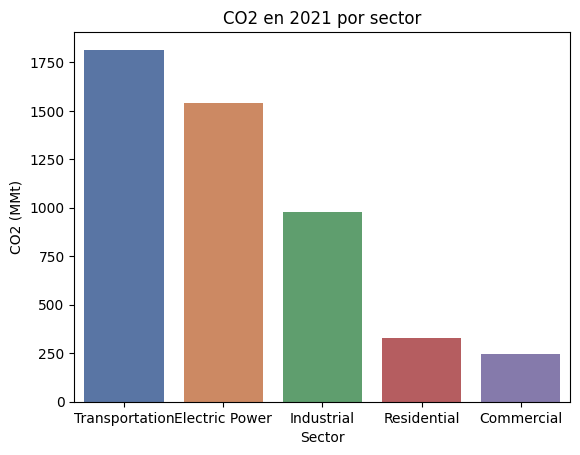

In [197]:
a = co2021[["Commercial","Electric Power", "Residential", "Industrial", "Transportation"]].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=a.index, y=a.values, palette="deep")
plt.title("CO2 en 2021 por sector")
plt.xlabel("Sector")
plt.ylabel("CO2 (MMt)")
plt.show()


En Nueva York, la emisión de CO2 por parte del sector de transporte supera por mucho al resto de los sectores

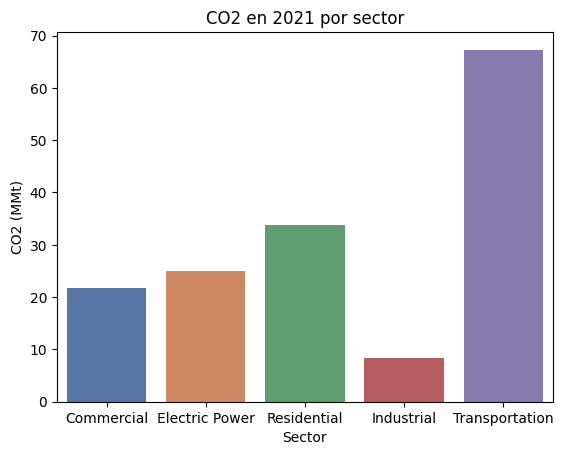

In [198]:
a = co2021[(co2021["State"] == "New York")]
a = a[["Commercial","Electric Power", "Residential", "Industrial", "Transportation"]]

plt.figure()
sns.barplot(x=a.columns.tolist(), y=a.values.tolist()[0], palette="deep")
plt.title("CO2 en 2021 por sector")
plt.xlabel("Sector")
plt.ylabel("CO2 (MMt)")
plt.show()